**Scenarios (SSPs):**

To capture the space of the possible futures, different Shared Socio-Economic Pathways
(SSPs) (Rosa et al. 2017), with their corresponding Representative Concentration Pathways
(RCPs) were considered. Several (4) climate models were taken into consideration for the
calculation of the bioclimatic variables corresponding to each RCPs – again to capture the
space of uncertainty.
SSPs Learn more
1. SSP1 “Sustainability », coupled with RCP 2.6
2. SSP2 « Middle of the road” coupled with RCP4.5
3. SSP3 “Regional rivalry” coupled generally with RCP7.0, here with RCP6.0
because bioclimatic data (Worldclim) availaibility
4. SSP4 “Inequality” coupled with RCP6.0
5. SSP5 “Fossil fuel development” coupled with RCP8.5


The corresponding RCP scenarios are named after the radiative forcing they model (e.g
RCP4.5 for a radiative forcing of +4,5 W/m2)
Climate models
Chosen to capture a wide space, and subject to data availaibility for the 4 RCPs:
- GISS-E2-R (gs)
- HadGEM2 ES (he)
- MIROC-ESM (mr)
- CCSM4 (cc)

If you want to simplify, just pick one climate model (e.g “he”) and focus on it.
Columns
Response variable:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

Let have a look at two different scenario for the same climate model : he

In [2]:
# Load the dataset
data_folder = 'NewDataForStudents/'
raster_folder = 'rasters_for_sanity_check/'
# ssp 1 he
# ssp 4 cc
# ssp 5 mr
ssp1 = pd.read_csv(data_folder+'2050_ssp4_cc.csv')

**Response variable:** Production

You probably just want to visualize production and/or change in production (ΔCalories,
Calories 2000, Calories 2050), though yields may be interesting as well. Production is in
calories. Yields are in calories/hectare. Log of yield is also provided.
The symbol Δ means change between 2000 and 2050.
All production and yields are annual.

'%cropland 2050': % of the pixel that is cropland in 2050

'log(cal_per_ha) 2050' : log of the yields in 2050

'cal_per_ha 2050': yield in 2050

'Calories 2050' : Production in 2050

'ΔCalories' : Change in production between 2000 and 2050

 population in each pixel

**Predictors of yields**
To simplify, I gave you just a few predictors, for year 2000 and 2050 each time.
Climate variables: temperature and precipitation (Temperature in °C*10, precip in mm)
Soil variable: workability_index + Slope and altitude

'Temperature 2050','Precipitation 2050', 'workability_index 2050', 'slo
pe', 'altitude',

In [3]:
ssp1.describe()

,pixel_id,Calories 2050,ΔCalories,%cropland 2050,log(cal_per_ha) 2050,cal_per_ha 2050,Δlog(cal_per_ha),Δcal_per_ha,lat,lon,ha_per_pixel,Temperature 2050,Precipitation 2050,workability_index 2050,slope,altitude,Population 2050
count,1.265261e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06,1.265261e+06
mean,3.504864e+06,1.183390e+13,-2.320458e+12,3.193186e-01,2.225985e+01,5.208337e+09,6.509822e+00,3.213857e+08,-2.238188e+01,2.129361e+01,6.942756e+03,1.564436e+02,8.904037e+02,1.966140e+00,8.949911e+01,7.139668e+02,6.585233e+03
std,1.509329e+06,1.532034e+13,1.072909e+13,3.450655e-01,4.868738e-01,2.489569e+09,1.024741e+01,3.924997e+09,2.911076e+01,7.840173e+01,1.471976e+03,1.074056e+02,7.143265e+02,1.548397e+00,1.830169e+00,8.873293e+02,2.750825e+04
min,4.158190e+05,7.193188e+09,-1.381420e+14,1.008065e-03,2.039240e+01,7.182993e+08,-2.302658e+00,-3.000376e+10,-8.200000e+01,-1.799200e+02,1.197665e+03,-2.210000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.234475e+06,5.884286e+11,-2.571960e+12,1.977107e-02,2.196602e+01,3.465146e+09,-2.897276e-01,-1.635103e+09,-4.692000e+01,-5.492000e+01,5.850655e+03,7.000000e+01,4.000000e+02,1.000000e+00,8.958492e+01,1.680000e+02,8.002143e+01
50%,3.139735e+06,4.709621e+12,6.933815e+10,1.560874e-01,2.225559e+01,4.628925e+09,6.955174e-03,2.716775e+07,-2.942000e+01,2.900000e+01,7.284645e+03,1.750000e+02,6.580000e+02,1.000000e+00,8.984214e+01,4.010000e+02,6.379486e+02
75%,4.737373e+06,1.880244e+13,1.287319e+12,6.035380e-01,2.262415e+01,6.691794e+09,2.170438e+01,2.862200e+09,1.420000e+00,8.500000e+01,8.285869e+03,2.570000e+02,1.211000e+03,2.000000e+00,8.994668e+01,9.320000e+02,3.822357e+03
max,7.544061e+06,1.192533e+14,8.454264e+13,1.000000e+00,2.392108e+01,2.447905e+10,2.336350e+01,1.604797e+10,5.550000e+01,1.798300e+02,8.605575e+03,3.310000e+02,1.103900e+04,7.000000e+00,8.999749e+01,6.473000e+03,2.973833e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x10e327710>,
 'caps': [<matplotlib.lines.Line2D at 0x10e327fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10e3275c0>],
 'medians': [<matplotlib.lines.Line2D at 0x10e32f860>],
 'fliers': [],
 'means': []}

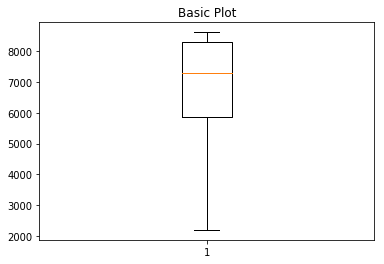

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(ssp1['ha_per_pixel'], showfliers=False)


In [4]:
ssp1.head()

,pixel_id,Calories 2050,ΔCalories,%cropland 2050,log(cal_per_ha) 2050,cal_per_ha 2050,Δlog(cal_per_ha),Δcal_per_ha,lat,lon,ha_per_pixel,Temperature 2050,Precipitation 2050,workability_index 2050,slope,altitude,Population 2050
0,415819,9.667444e+09,9.667444e+09,0.001041,22.771875,7.757108e+09,22.771875,7.757108e+09,-82.0,-88.42,1197.6646,-175,99,6,89.97842,160,0.0
1,415832,9.277905e+09,9.277905e+09,0.001041,22.730747,7.444544e+09,22.730747,7.444544e+09,-82.0,-87.33,1197.6646,-177,102,6,89.98655,244,0.0
2,415838,1.027458e+10,1.027458e+10,0.001041,22.832785,8.244273e+09,22.832785,8.244273e+09,-82.0,-86.83,1197.6646,-182,113,6,89.94438,312,0.0
3,415843,1.013503e+10,1.013503e+10,0.001041,22.819109,8.132295e+09,22.819109,8.132295e+09,-82.0,-86.42,1197.6646,-179,107,6,89.95476,292,0.0
4,415848,1.082675e+10,1.082675e+10,0.001041,22.885132,8.687333e+09,22.885132,8.687333e+09,-82.0,-86.00,1197.6646,-192,145,6,89.97616,570,0.0


In [5]:
ssp1= ssp1.dropna()

In [6]:
Test = pd.DataFrame()

In [7]:
Test['Calories'] = ssp1['Calories 2050']#.apply(lambda x:int(np.log(x)*1000))
#Test['Cropland'] = ssp1['%cropland 2050']*ssp1['ha_per_pixel']
#Test['log(cal_per_ha) 2050'] = ssp1['log(cal_per_ha) 2050']
Test['Yields'] = ssp1['cal_per_ha 2050']
Test['Population'] = ssp1['Population 2050']#/ssp1['ha_per_pixel']

Test['lon'] = ssp1['lon']
Test['lat'] = -ssp1['lat']

In [8]:
Test.head()

,Calories,Yields,Population,lon,lat
0,9.667444e+09,7.757108e+09,0.0,-88.42,82.0
1,9.277905e+09,7.444544e+09,0.0,-87.33,82.0
2,1.027458e+10,8.244273e+09,0.0,-86.83,82.0
3,1.013503e+10,8.132295e+09,0.0,-86.42,82.0
4,1.082675e+10,8.687333e+09,0.0,-86.00,82.0


In [9]:
Test.describe()

,Calories,Yields,Population,lon,lat
count,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06,1.191402e+06
mean,1.183390e+13,5.208337e+09,6.924946e+03,2.251265e+01,2.291196e+01
std,1.532034e+13,2.489569e+09,2.795219e+04,7.763127e+01,2.904937e+01
min,7.193188e+09,7.182993e+08,0.000000e+00,-1.799200e+02,-5.542000e+01
25%,5.884286e+11,3.465146e+09,8.935726e+01,-5.183000e+01,-3.300000e-01
50%,4.709621e+12,4.628925e+09,7.233048e+02,2.975000e+01,2.992000e+01
75%,1.880244e+13,6.691794e+09,4.179786e+03,8.483000e+01,4.725000e+01
max,1.192533e+14,2.447905e+10,2.973833e+06,1.798300e+02,8.200000e+01


In [10]:
# All different values of lat
vec_lat = Test['lat'].unique()

In [11]:
# Init the Dataframe 
reduced_calories = pd.DataFrame(columns=['Calories', 'Yields', 'Population', 'lon', 'lat'])

In [ ]:
# This code will compress the data by taking the mean of 5 (sample) points having the same latitude 
# and a close longitude distance = 1 (distance)

sample = 8
distance = 3
iterat = 0

# Iterate through all the different 'lat' values
for lat in vec_lat:
    lat_ind = np.where(Test['lat']==lat)[0]
    temp_df_lat = Test.iloc[lat_ind]
    
    # index will iterate from 0 to 'sample' to create a mean of the values
    index = 0
    
    # For each group in samples using mean of near distance
    for i in range(temp_df_lat.shape[0]):
        
        temp_cal = temp_df_lat.iloc[i]['Calories']
        temp_temp = temp_df_lat.iloc[i]['Yields']
        temp_pop = temp_df_lat.iloc[i]['Population']
        temp_lon = temp_df_lat.iloc[i]['lon']
        temp_lat = temp_df_lat.iloc[i]['lat']
        
        # First value of the subsample
        if(index == 0):
            # the 'prev_X' values will be tested with the next point to check the longitude distance
            prev_cal = temp_cal
            #prev_crop = temp_crop
            prev_temp = temp_temp
            prev_pop = temp_pop
            prev_lon = temp_lon
            prev_lat = temp_lat
            
            mean_df = pd.DataFrame([[temp_cal, temp_temp, temp_pop, temp_lon,temp_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
            index =index +1
        
        else:
            # Test if the longitude distance between the points is less than 'distance'
            if( (max(temp_lon,prev_lon) - min(temp_lon,prev_lon) <= distance) ):  
                if(index < sample):
                    temp_df = pd.DataFrame([[temp_cal, temp_temp, temp_pop, temp_lon,temp_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
                    mean_df = mean_df.append(temp_df)
                    index = index + 1
                    
                elif(index == sample):
                    # Add the last value of the subsample
                    temp_df = pd.DataFrame([[temp_cal, temp_temp, temp_pop, temp_lon,temp_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
                    mean_df = mean_df.append(temp_df)
                    
                    # Compute the mean for the 5 ('sample') subsamples 
                    temp_mean = mean_df.mean()
                    mean_cal = temp_mean[0]
                    #mean_crop = temp_mean[1]
                    mean_temp = temp_mean[1]
                    mean_pop = temp_mean[2]
                    mean_long = temp_mean[3]
                    mean_lat = temp_mean[4]
                    
                    # Append the values to the dataframe
                    temp_df2 = pd.DataFrame([[mean_cal, mean_temp, mean_pop, mean_long,mean_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
                    reduced_calories = reduced_calories.append(temp_df2, ignore_index=True)
                    index = 0
                
            # The point is too far from the previous point : create a new subsample and store the previous one
            else:
                # Compute the mean for the 5 ('sample') subsamples 
                temp_mean = mean_df.mean()
                mean_cal = temp_mean[0]
                #mean_crop = temp_mean[1]
                mean_temp = temp_mean[1]
                mean_pop = temp_mean[2]
                mean_long = temp_mean[3]
                mean_lat = temp_mean[4]
                
                # Append the values to the dataframe
                temp_df2 = pd.DataFrame([[mean_cal, mean_temp, mean_pop, mean_long,mean_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
                reduced_calories = reduced_calories.append(temp_df2, ignore_index=True)

                # Start new subsample
                prev_cal = temp_cal
                #prev_crop = temp_crop
                prev_temp = temp_temp
                prev_pop = temp_pop
                prev_lon = temp_lon
                prev_lat = temp_lat
                mean_df = pd.DataFrame([[temp_cal, temp_temp, temp_pop, temp_lon,temp_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
                index = 1
                
        if(i == temp_df_lat.shape[0]-1):
            # If final point of the dataframe, store it
            temp_mean = mean_df.mean()
            mean_cal = temp_mean[0]
            #mean_crop = temp_mean[1]
            mean_temp = temp_mean[1]
            mean_pop = temp_mean[2]
            mean_long = temp_mean[3] 
            mean_lat = temp_mean[4]
            
            temp_df2 = pd.DataFrame([[mean_cal, mean_temp, mean_pop, mean_long,mean_lat]], columns = ['Calories', 'Yields', 'Population', 'lon', 'lat'])
            reduced_calories = reduced_calories.append(temp_df2, ignore_index=True)
                
    # Observe the progression
    iterat = iterat +1
    print("Iteration %d / %d" % (iterat, len(vec_lat)))
            

Iteration 1 / 1649
Iteration 2 / 1649
Iteration 3 / 1649
Iteration 4 / 1649
Iteration 5 / 1649
Iteration 6 / 1649
Iteration 7 / 1649
Iteration 8 / 1649
Iteration 9 / 1649
Iteration 10 / 1649
Iteration 11 / 1649
Iteration 12 / 1649
Iteration 13 / 1649
Iteration 14 / 1649
Iteration 15 / 1649
Iteration 16 / 1649
Iteration 17 / 1649
Iteration 18 / 1649
Iteration 19 / 1649
Iteration 20 / 1649
Iteration 21 / 1649
Iteration 22 / 1649
Iteration 23 / 1649
Iteration 24 / 1649
Iteration 25 / 1649
Iteration 26 / 1649
Iteration 27 / 1649
Iteration 28 / 1649
Iteration 29 / 1649
Iteration 30 / 1649
Iteration 31 / 1649
Iteration 32 / 1649
Iteration 33 / 1649
Iteration 34 / 1649
Iteration 35 / 1649
Iteration 36 / 1649
Iteration 37 / 1649
Iteration 38 / 1649
Iteration 39 / 1649
Iteration 40 / 1649
Iteration 41 / 1649
Iteration 42 / 1649
Iteration 43 / 1649
Iteration 44 / 1649
Iteration 45 / 1649
Iteration 46 / 1649
Iteration 47 / 1649
Iteration 48 / 1649
Iteration 49 / 1649
Iteration 50 / 1649
Iteration

Iteration 397 / 1649
Iteration 398 / 1649
Iteration 399 / 1649
Iteration 400 / 1649
Iteration 401 / 1649
Iteration 402 / 1649
Iteration 403 / 1649
Iteration 404 / 1649
Iteration 405 / 1649
Iteration 406 / 1649
Iteration 407 / 1649
Iteration 408 / 1649
Iteration 409 / 1649
Iteration 410 / 1649
Iteration 411 / 1649
Iteration 412 / 1649
Iteration 413 / 1649
Iteration 414 / 1649
Iteration 415 / 1649
Iteration 416 / 1649
Iteration 417 / 1649
Iteration 418 / 1649
Iteration 419 / 1649
Iteration 420 / 1649
Iteration 421 / 1649
Iteration 422 / 1649
Iteration 423 / 1649
Iteration 424 / 1649
Iteration 425 / 1649
Iteration 426 / 1649
Iteration 427 / 1649
Iteration 428 / 1649
Iteration 429 / 1649
Iteration 430 / 1649
Iteration 431 / 1649
Iteration 432 / 1649
Iteration 433 / 1649
Iteration 434 / 1649
Iteration 435 / 1649
Iteration 436 / 1649
Iteration 437 / 1649
Iteration 438 / 1649
Iteration 439 / 1649
Iteration 440 / 1649
Iteration 441 / 1649
Iteration 442 / 1649
Iteration 443 / 1649
Iteration 444

Iteration 788 / 1649
Iteration 789 / 1649
Iteration 790 / 1649
Iteration 791 / 1649
Iteration 792 / 1649
Iteration 793 / 1649
Iteration 794 / 1649
Iteration 795 / 1649
Iteration 796 / 1649
Iteration 797 / 1649
Iteration 798 / 1649
Iteration 799 / 1649
Iteration 800 / 1649
Iteration 801 / 1649
Iteration 802 / 1649
Iteration 803 / 1649
Iteration 804 / 1649
Iteration 805 / 1649
Iteration 806 / 1649
Iteration 807 / 1649
Iteration 808 / 1649
Iteration 809 / 1649
Iteration 810 / 1649
Iteration 811 / 1649
Iteration 812 / 1649
Iteration 813 / 1649
Iteration 814 / 1649
Iteration 815 / 1649
Iteration 816 / 1649
Iteration 817 / 1649
Iteration 818 / 1649
Iteration 819 / 1649
Iteration 820 / 1649
Iteration 821 / 1649
Iteration 822 / 1649
Iteration 823 / 1649
Iteration 824 / 1649
Iteration 825 / 1649
Iteration 826 / 1649
Iteration 827 / 1649
Iteration 828 / 1649
Iteration 829 / 1649
Iteration 830 / 1649
Iteration 831 / 1649
Iteration 832 / 1649
Iteration 833 / 1649
Iteration 834 / 1649
Iteration 835

Iteration 1171 / 1649
Iteration 1172 / 1649
Iteration 1173 / 1649
Iteration 1174 / 1649
Iteration 1175 / 1649
Iteration 1176 / 1649
Iteration 1177 / 1649
Iteration 1178 / 1649
Iteration 1179 / 1649
Iteration 1180 / 1649
Iteration 1181 / 1649
Iteration 1182 / 1649
Iteration 1183 / 1649
Iteration 1184 / 1649
Iteration 1185 / 1649
Iteration 1186 / 1649
Iteration 1187 / 1649
Iteration 1188 / 1649
Iteration 1189 / 1649
Iteration 1190 / 1649
Iteration 1191 / 1649
Iteration 1192 / 1649
Iteration 1193 / 1649
Iteration 1194 / 1649
Iteration 1195 / 1649
Iteration 1196 / 1649
Iteration 1197 / 1649
Iteration 1198 / 1649
Iteration 1199 / 1649
Iteration 1200 / 1649
Iteration 1201 / 1649
Iteration 1202 / 1649
Iteration 1203 / 1649
Iteration 1204 / 1649
Iteration 1205 / 1649
Iteration 1206 / 1649
Iteration 1207 / 1649
Iteration 1208 / 1649
Iteration 1209 / 1649
Iteration 1210 / 1649
Iteration 1211 / 1649
Iteration 1212 / 1649
Iteration 1213 / 1649
Iteration 1214 / 1649
Iteration 1215 / 1649
Iteration 

Iteration 1544 / 1649
Iteration 1545 / 1649
Iteration 1546 / 1649
Iteration 1547 / 1649
Iteration 1548 / 1649
Iteration 1549 / 1649
Iteration 1550 / 1649
Iteration 1551 / 1649
Iteration 1552 / 1649
Iteration 1553 / 1649
Iteration 1554 / 1649
Iteration 1555 / 1649
Iteration 1556 / 1649
Iteration 1557 / 1649
Iteration 1558 / 1649
Iteration 1559 / 1649
Iteration 1560 / 1649
Iteration 1561 / 1649
Iteration 1562 / 1649
Iteration 1563 / 1649
Iteration 1564 / 1649
Iteration 1565 / 1649
Iteration 1566 / 1649
Iteration 1567 / 1649
Iteration 1568 / 1649
Iteration 1569 / 1649
Iteration 1570 / 1649
Iteration 1571 / 1649
Iteration 1572 / 1649
Iteration 1573 / 1649
Iteration 1574 / 1649
Iteration 1575 / 1649
Iteration 1576 / 1649
Iteration 1577 / 1649
Iteration 1578 / 1649
Iteration 1579 / 1649
Iteration 1580 / 1649
Iteration 1581 / 1649
Iteration 1582 / 1649
Iteration 1583 / 1649
Iteration 1584 / 1649
Iteration 1585 / 1649
Iteration 1586 / 1649
Iteration 1587 / 1649
Iteration 1588 / 1649
Iteration 

In [ ]:
reduced_calories.head()

In [ ]:
# Write to json file 
reduced_calories.to_json('data.json', orient='records')

In [ ]:
# Transform the json file into geojson file

in_file = 'data.json'
out_file = 'over_ssp4.geojson'


data = json.load(open(in_file))

geojson = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [d["lon"], d["lat"]]
            },
        "properties" : {
            "calories": d["Calories"],
            "yields": d["Yields"],
            "population": d["Population"],
            }
     } for d in data]
}


output = open(out_file, 'w')
json.dump(geojson, output)

In [ ]:
reduced_calories.describe()